
<h1 style=" text-align:center; color:Red; font-size:40px; display: block;"> <u><b><i> MALARIA PARASITE DETECTION USING TRANSFER LEARNING 🦟🦟</i></b></u> </h1>
<p style="text-align:center; ">
<img src="https://d2jx2rerrg6sh3.cloudfront.net/image-handler/ts/20211027100544/ri/673/picture/2021/10/shutterstock_1483138139-1.jpg" style='width: 400px;'>
</p>


# Importing The Modules

In [ ]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from tensorflow.keras.applications.resnet import ResNet50
from keras.models import *
from keras.layers import *
import keras
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
warnings.filterwarnings('ignore')



# Reading The File Names

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 97% 658M/675M [00:05<00:00, 177MB/s]
100% 675M/675M [00:05<00:00, 118MB/s]


In [ ]:
!unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

# Data Preparation

In [ ]:
def data_prep(parasitized,uninfected):

    parasitized= ["/content/cell_images/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["/content/cell_images/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(os.listdir('/content/cell_images/Parasitized'), os.listdir('/content/cell_images/Uninfected'))
df.head()
df.shape

(27560, 2)

# Displaying 5 Images For Each Of The Two Labels

Displaying 5 Parasitized Images: 



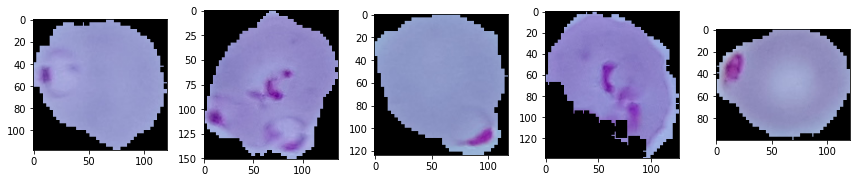


Displaying 5 Uninfected Images: 



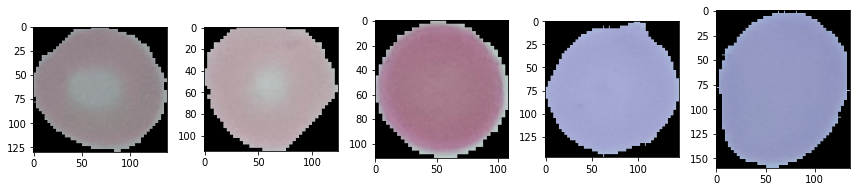

In [ ]:

print("Displaying 5 Parasitized Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print()
print("Displaying 5 Uninfected Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


# Distribution Of Samples

Text(0.5, 1.0, 'Distribution of samples according to the categories')

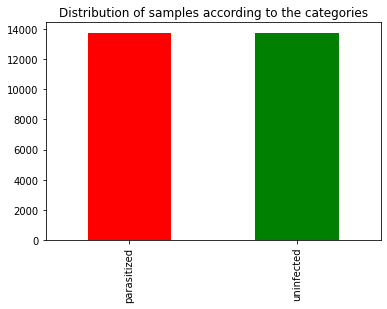

In [ ]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples according to the categories')

# Augmenting The Data

In [ ]:

train, test = train_test_split(df, test_size = .20)

img_datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest', validation_split=0.2)
                               
                               
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    #tf.keras.callbacks.ModelCheckpoint(filepath=''),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
def plot_loss_and_accuracy(mo_fit):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()


# Building CNN

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 108s 1s/step - loss: 4.3227 - accuracy: 0.5460 - val_loss: 0.6645 - val_accuracy: 0.5950
Epoch 2/4
100/100 [==============================] - 90s 901ms/step - loss: 0.6662 - accuracy: 0.6040 - val_loss: 0.6271 - val_accuracy: 0.6880
Epoch 3/4
100/100 [==============================] - 88s 882ms/step - loss: 0.6625 - accuracy: 0.6380 - val_loss: 0.5535 - val_accuracy: 0.7850
Epoch 4/4
100/100 [==============================] - 105s 1s/step - loss: 0.6588 - accuracy: 0.6490 - val_loss: 0.6729 - val_accuracy: 0.6130


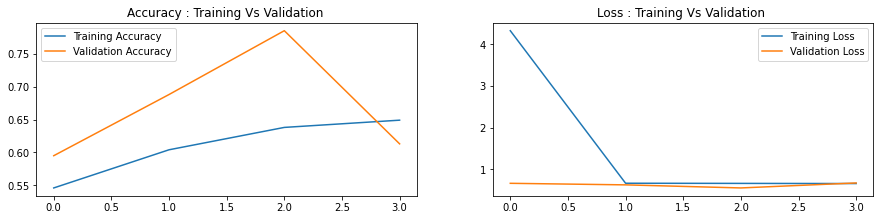

In [ ]:
def cnn_model(df, train, test, my_callbacks):
    
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    model1 = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(224,224,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(224,224,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(224,224,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(224,224,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    model_history = model1.fit_generator(generator = x_train, 
                   steps_per_epoch = 100,
                   epochs = 4 ,
                   validation_data = x_test,
                   validation_steps = 100, callbacks=my_callbacks)
    cnnmodel_test = [model_history,model1]
    
    return cnnmodel_test

cnnmodel_final =cnn_model(df, train, test, my_callbacks)

plot_loss_and_accuracy(cnnmodel_final[0])

    



# Building ResNet50

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/4
100/100 [==============================] - 919s 9s/step - loss: 1.3649 - accuracy: 0.8660 - val_loss: 29.7193 - val_accuracy: 0.8300
Epoch 2/4
100/100 [==============================] - 915s 9s/step - loss: 0.7791 - accuracy: 0.9180 - val_loss: 1.8127 - val_accuracy: 0.9420
Epoch 3/4
100/100 [==============================] - 868s 9s/step - loss: 0.3713 - accuracy: 0.9270 - val_loss: 2.8213 - val_accuracy: 0.9560
Epoch 4/4
100/100 [==============================] - 868s 9s/step - loss: 0.2516 - accuracy: 0.9540 - val_loss: 17.0859 - val_accuracy: 0.9290


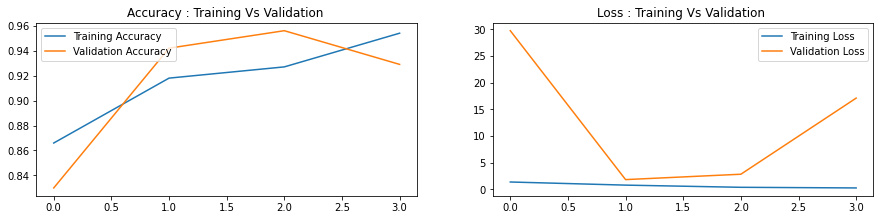

In [ ]:
def resnet_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    resnet_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
    model2=Sequential()
    model2.add(resnet_model)
    model2.add(Flatten())
    model2.add(Dense(1024,activation='relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(1,activation='sigmoid'))
    model2.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    
    model_history = model2.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100,
    epochs = 4, callbacks=my_callbacks)

    
    
    resnettest_model = [model_history,model2]
    
    return resnettest_model

resnet_final = resnet_model(df, train, test, my_callbacks)    
plot_loss_and_accuracy(resnet_final[0])

# Building VGG 19

In [ ]:
def vgg19_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(224,224,3), weights='imagenet',include_top=False)
    model3=Sequential()
    model3.add(vgg19_model)
    model3.add(Flatten())
    model3.add(Dense(1024,activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(1,activation='sigmoid'))
    model3.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    model_history = model3.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 20 , callbacks=my_callbacks)
    vgg19 = [model_history, model3]
    return vgg19
    
vgg19Model=vgg19_model(df, train, test, my_callbacks)

plot_loss_and_accuracy(vgg19Model[0])


Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/20
100/100 [==============================] - 2698s 27s/step - loss: 0.9480 - accuracy: 0.5090 - val_loss: 0.6034 - val_accuracy: 0.7190
Epoch 2/20
100/100 [==============================] - 2696s 27s/step - loss: 0.4628 - accuracy: 0.8210 - val_loss: 0.2244 - val_accuracy: 0.9520
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.2934 - accuracy: 0.9200 

In [ ]:
cnnmodel_final[1].save('cnn_model.h5')
resnet_final[1].save('resnet_model.h5')
vgg19Model[1].save('vgg19_model.h5')


# do stuff with model2 (e.g. predict()

In [ ]:
cnn_img = load_model('cnn_model.h5')
resnet_img=load_model('resnet_model.h5')
vgg19_img= load_model('vgg19_model.h5')

In [ ]:
#img = "/content/cell_images/Parasitized"

# Getting the first Four images 
#ImgDir = list(os.listdir(img)) 
#ImgDir = ImgDir[:3] 

# Loading Just a random image from the Parasitized images folder. 
imagePath ="/content/cell_images/Uninfected/C106P67ThinF_IMG_20150924_102245_cell_76.png"

# Displaying the full path to the parasitized image we want to use for prediction. 
print(imagePath)

/content/cell_images/Uninfected/C106P67ThinF_IMG_20150924_102245_cell_76.png


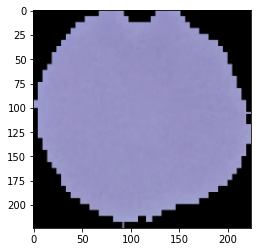

[[0.7354355]]
uninfected


In [ ]:
imagePath ="/content/cell_images/Uninfected/C106P67ThinF_IMG_20150924_102245_cell_76.png"
img = cv2.imread(imagePath); 

# Setting the dimensions for the loaded image to be converted into and displaying the shape of the image 
print("Loaded Image Shape: {}".format(img.shape)); 
dim = (224, 224); 

# Resizing the image 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA); 
plt.grid(False) 
#plt.imshow(img) 
#plt.show() 

# Expanding the image dimensions 
image = np.expand_dims(img, axis = 0); 

# Making Final Predictions 
result1 = cnn_img.predict(image)
result2 = resnet_img.predict(image)
result3 = vgg19_img.predict(image)
print(result1)

if result1 > 0.5:
  a='uninfected'
else:
  a='Infected'
plt.imshow(img) 
plt.show()
print(a)

if result2 > 0.5:
  b='uninfected'
else:
  b='Infected'
plt.imshow(img) 
plt.show()
print(b)

if result3 > 0.5:
  c='uninfected'
else:
  c='Infected'
plt.imshow(img) 
plt.show()
print(c)



# Creating a loop to get the actual predicted class 
#for key, value in (x_train.class class_indices.items()): 
    #if value == result: 
        #print("The Predicted Class is: {}".format(key))